In [69]:
%matplotlib notebook

from modsim import *

In [47]:
m = UNITS.meters
s = UNITS.seconds

In [70]:
import random

In [48]:
condition = Condition(floorheight = 3 *m,
                     num_floors = 1,
                     v_max = .762 * m / s,
                     a_max = .65 * m / s ** 2)

In [49]:
# 18 seconds for elevator to start, 9 to stop

In [50]:
def find_magic_num(v_max, a_max):
    t = v_max / a_max
    num_magic = .5 * a_max * t **2 + v_max * t
    return num_magic

In [51]:
find_magic_num(condition.v_max, condition.a_max)

<Quantity(1.3399476923076923, 'meter')>

In [52]:
def make_system(condition):
    unpack(condition)
    height = floorheight * num_floors
    init = State(y = 0 * m, vy = 0 * m / s)
    ts = linspace(0,45,10000)
    magic_num = find_magic_num(v_max, a_max)
    return System(init = init,end_time = 0, finished = False, a_max = a_max, v_max = v_max, magic_num = magic_num, height = height, ts = ts)

    

In [53]:
system = make_system(condition)
system.finished

False

In [54]:
def slope_func(state, t, system):
    unpack(system)
    y, vy = state
    ay = a_max
    if(system.finished == True):
        return 0,0
    if(vy > v_max):
        ay = 0
        vy = v_max
    if(height < y):
        ay = -a_max
        #print(t)
        return vy, ay
    if(y>= height * .98):
        system.finished = True
        #print(t)
        system.end_time = t
    
    return vy,ay

In [55]:
run_odeint(system, slope_func)

<IPython.core.display.Javascript object>


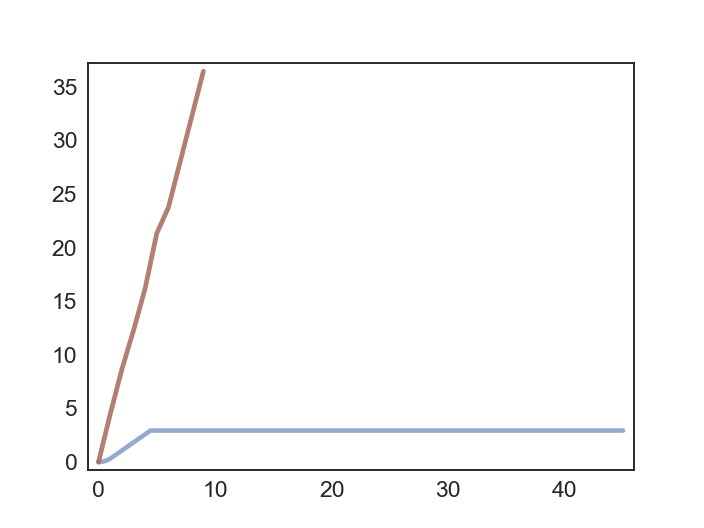

<Quantity(3, 'meter')>

In [56]:
plot(system.results.y)
system.height

In [90]:
floors = [0,1,2,3,4,10]

In [91]:
system.end_time

4.446052718314756

In [94]:
def multiple_floors(floors):
    total_time = 0
    for i in range(len(floors) - 1):
        if(floors[i] != floors[i+1]):
            condition = Condition(floorheight = 3 *m,
                     num_floors = floors[i+1] - floors[i],
                     v_max = .762 * m / s,
                     a_max = .65 * m / s ** 2)
            system = make_system(condition)
            run_odeint(system,slope_func)
            total_time += system.end_time
    return total_time
        

41.52723435220048


In [61]:
def sweep_basic_floors(max):
    sweep = SweepSeries()
    for i in range(max):
        condition = Condition(floorheight = 3 *m,
                     num_floors = i,
                     v_max = .762 * m / s,
                     a_max = .65 * m / s ** 2)
        system = make_system(condition)
        run_odeint(system,slope_func)
        sweep[i] = system.end_time
    return sweep

In [62]:
sweep = sweep_basic_floors(10)

In [134]:
def sweep_3_people(max):
    sweep = SweepSeries()
    for i in range(max):
        floors = [0,random.randint(1,i + 1), random.randint(1,i + 1), i + 1]
        floors.sort()
        print(floors)
        sweep[i] = multiple_floors(floors)
    return sweep

In [147]:
sweep2 = sweep_3_people(10)

[0, 1, 1, 1]
[0, 1, 1, 2]
[0, 1, 2, 3]
[0, 2, 4, 4]
[0, 1, 3, 5]
[0, 2, 6, 6]
[0, 2, 6, 7]
[0, 1, 7, 8]
[0, 6, 6, 9]
[0, 5, 8, 10]


In [148]:
print(sweep2)

0     4.446053
1     8.892105
2    13.338158
3    17.257410
4    21.703462
5    24.814569
6    29.260622
7    32.635129
8    35.999165
9    42.209579
dtype: float64


<IPython.core.display.Javascript object>


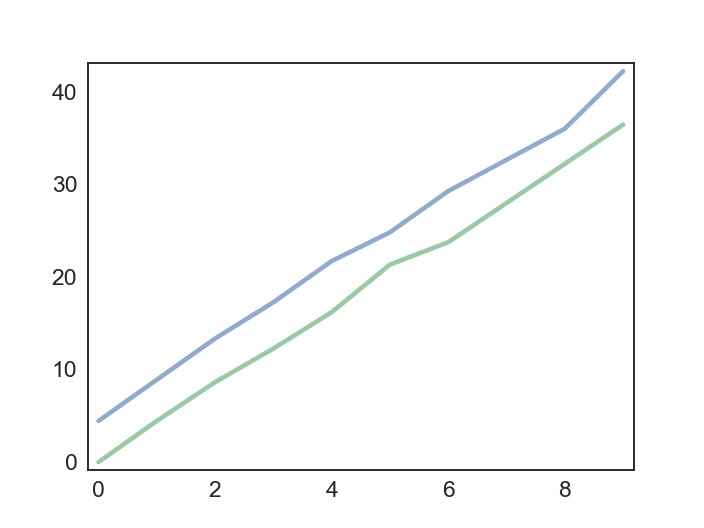

In [149]:
plot(sweep2)
plot(sweep)